In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
word2vec = datapath('/Users/mwasserman/programming/projects/spacy_lecture/word2vec_100d.txt')
glove_file = datapath('/Users/mwasserman/programming/projects/spacy_lecture/glove.6B.100d.txt')
# word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
# glove2word2vec(glove_file, word2vec_glove_file)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec)

In [5]:
model.most_similar('obama')

[('barack', 0.9786518812179565),
 ('ENTITY/Barack_Obama', 0.8945704698562622),
 ('biden', 0.8100842833518982),
 ('ENTITY/Joe_Biden', 0.8024177551269531),
 ('trump', 0.7982811331748962),
 ('clinton', 0.7979164123535156),
 ('ENTITY/Hillary_Clinton', 0.7967318892478943),
 ('ENTITY/Michelle_Obama', 0.7866920828819275),
 ('ENTITY/Donald_Trump', 0.7821940183639526),
 ('hillary', 0.7757807970046997)]

In [6]:
model.most_similar('banana')

[('bananas', 0.8461681604385376),
 ('pineapple', 0.8310538530349731),
 ('papaya', 0.8271547555923462),
 ('coconut', 0.7988521456718445),
 ('ginanggang', 0.7959400415420532),
 ('breadfruits', 0.7909026145935059),
 ('watermelon', 0.7908951044082642),
 ('coconuts', 0.7895557880401611),
 ('saonjo', 0.789016604423523),
 ('bluggoe', 0.7884088158607483)]

In [7]:
model.most_similar(negative='banana')

[('ENTITY/Scythris_inertella', 0.3487658202648163),
 ('ENTITY/Herrichia_excelsella', 0.3068707585334778),
 ('ENTITY/Peribatodes_perversaria', 0.2772373557090759),
 ('ENTITY/Phiaris_septentrionana', 0.2549286484718323),
 ('ENTITY/Acanthopsyche_ecksteini', 0.24981063604354858),
 ('ENTITY/Megalodes_eximia', 0.2447773516178131),
 ('ENTITY/Image:Honey_badger.jpg', 0.2438315451145172),
 ('ENTITY/Nola_chlamitulalis', 0.23774507641792297),
 ('ENTITY/Dichrorampha_gruneriana', 0.23250581324100494),
 ('ENTITY/Scythris_flaviventrella', 0.2278483510017395)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8306


In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

![Analogy](imgs/word2vec-king-queen-composition.png)

In [10]:
analogy('japan', 'japanese', 'australia')

'australian'

In [11]:
analogy('australia', 'beer', 'france')

'ENTITY/Marie_Brizard_et_Roger_International_'

In [12]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'strange'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/Users/mwasserman/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [16]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

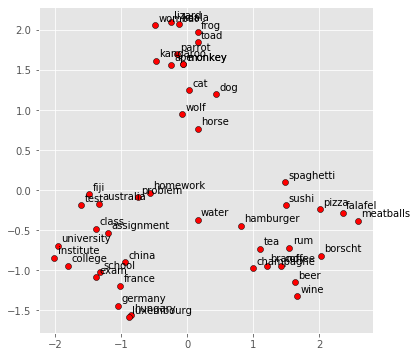

In [18]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

/Users/mwasserman/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mwasserman/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mwasserman/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 23453 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mwasserman/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0, flags=flags)


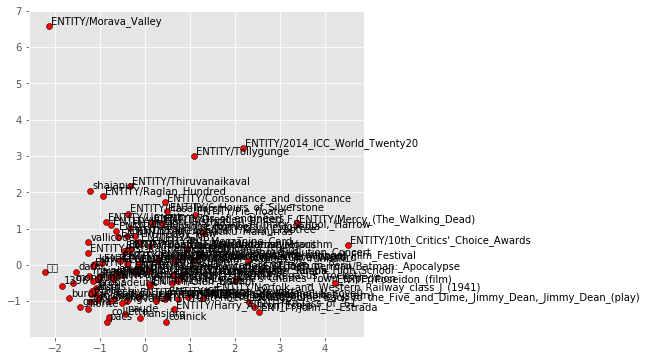

In [20]:
display_pca_scatterplot(model, sample=100)